## Downloading data

HRP only requires historical returns

In [1]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.4'

In [3]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA","NVDA","AAPL","AMD","F","SOS","RGS"] 

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  20 of 20 completed


,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2023-05-16,172.070007,279.190002,101.480003,113.400002,496.149994,90.980003,11.25,78.320000,134.320007,63.220001,28.540001,380.239990,311.059998,292.130005,37.009998,1.04,3.92,166.520004,479.720001,102.519997
2023-05-17,172.690002,284.630005,103.750000,115.500000,495.000000,92.769997,11.50,78.809998,138.449997,63.150002,29.879999,387.000000,314.000000,301.779999,36.750000,1.04,3.93,173.860001,484.809998,104.820000
2023-05-18,175.050003,287.480011,107.930000,118.150002,498.100006,93.760002,11.64,78.209999,139.500000,62.799999,29.959999,392.019989,318.519989,316.779999,36.480000,1.02,4.00,176.889999,479.230011,105.769997
2023-05-19,175.160004,289.910004,105.820000,116.250000,496.519989,91.349998,11.65,78.849998,139.179993,62.830002,29.480000,385.570007,318.339996,312.640015,36.770000,1.01,3.89,180.139999,478.820007,106.260002
2023-05-22,174.199997,290.950012,108.000000,115.010002,491.869995,91.820000,11.63,78.620003,138.029999,61.509998,29.320000,384.529999,321.179993,311.760010,38.750000,1.02,4.02,188.869995,480.619995,104.970001


In [4]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2023-05-16,0.000000,0.006054,0.041889,0.019784,-0.011732,-0.020246,-0.033505,-0.000765,-0.006729,-0.011261,-0.017556,-0.008268,0.007368,0.008980,-0.004037,-0.009524,0.023499,0.001022,-0.014665,-0.024270
2023-05-17,0.003603,0.019485,0.022369,0.018519,-0.002318,0.019675,0.022222,0.006256,0.030747,-0.001107,0.046952,0.017778,0.009452,0.033033,-0.007025,0.000000,0.002551,0.044079,0.010610,0.022435
2023-05-18,0.013666,0.010013,0.040289,0.022944,0.006263,0.010672,0.012174,-0.007613,0.007584,-0.005542,0.002677,0.012972,0.014395,0.049705,-0.007347,-0.019231,0.017812,0.017428,-0.011510,0.009063
2023-05-19,0.000628,0.008453,-0.019550,-0.016081,-0.003172,-0.025704,0.000859,0.008183,-0.002294,0.000478,-0.016021,-0.016453,-0.000565,-0.013069,0.007950,-0.009804,-0.027500,0.018373,-0.000856,0.004633
2023-05-22,-0.005481,0.003587,0.020601,-0.010667,-0.009365,0.005145,-0.001717,-0.002917,-0.008263,-0.021009,-0.005427,-0.002697,0.008921,-0.002815,0.053848,0.009901,0.033419,0.048462,0.003759,-0.012140


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [5]:
from pypfopt import HRPOpt

In [6]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.02896),
             ('ACN', 0.04519),
             ('AMD', 0.00968),
             ('AMZN', 0.02058),
             ('COST', 0.05572),
             ('DIS', 0.05336),
             ('F', 0.04388),
             ('GILD', 0.04657),
             ('JPM', 0.04186),
             ('KO', 0.13474),
             ('LUV', 0.05857),
             ('MA', 0.04421),
             ('MSFT', 0.03584),
             ('NVDA', 0.00935),
             ('PFE', 0.10673),
             ('RGS', 0.04354),
             ('SOS', 0.00567),
             ('TSLA', 0.02895),
             ('UNH', 0.05935),
             ('XOM', 0.12726)])

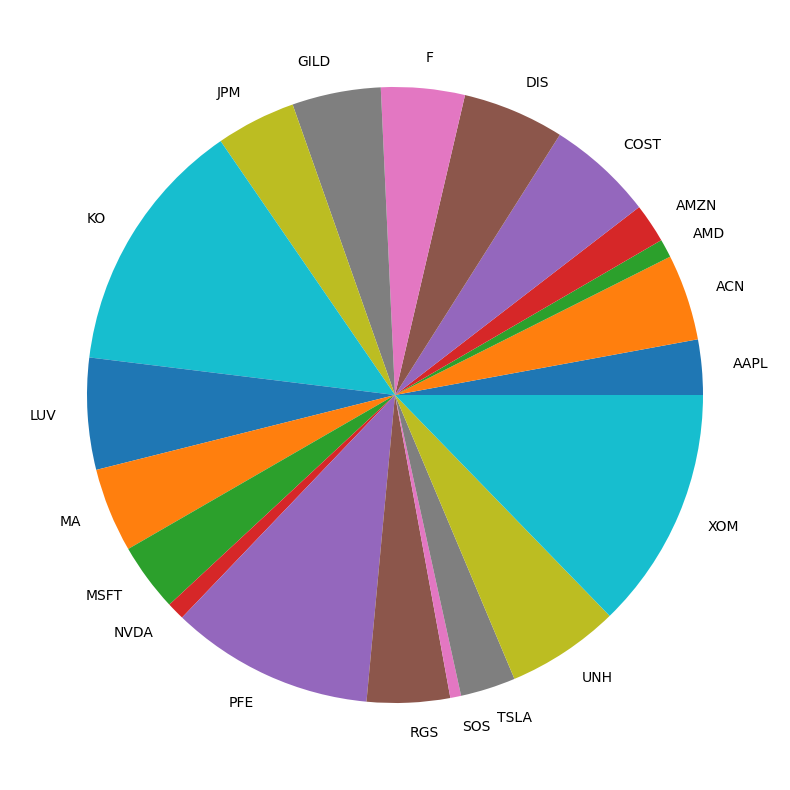

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 20.1%
Annual volatility: 19.2%
Sharpe Ratio: 0.94


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

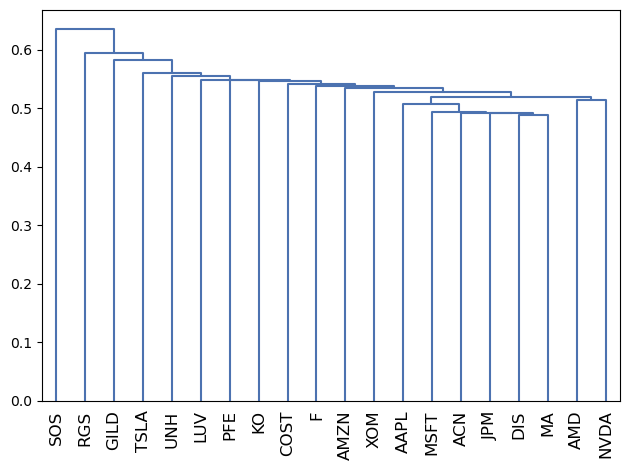

In [9]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.